# Demo

## The Generator: Generation of graph-based Game Economies

* Generate a new and valid economy graph by providing a configuration dictionary ``conf``. Specify how many nodes of which types should be in the economy.
* There are some constraints to generate valid graphs e.g., there must be at least one source and one pool node! See paper for detailed information.

In [7]:
from geevo.evolution.generator import EvolutionaryGraphGeneration
from geevo.evolution.balancer import Balancer, BalancerV2
from geevo import nodes as n
from geevo.graph import Graph
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import warnings

warnings.filterwarnings('ignore')

# define config as input to control graph generation
conf = {
    n.Source: 3,
    n.RandomGate: 2,
    n.Pool: 4,
    n.Converter: 1
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# generate
egg = EvolutionaryGraphGeneration(conf)
egg.run()

Stopped after 55 iterations in 87.842ms. Num edges 11, fitness: 0


True

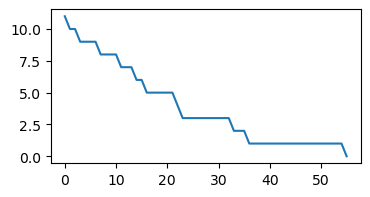

In [3]:
# plot fitness
plt.figure(figsize=(4, 2))
plt.plot(egg.fitness)

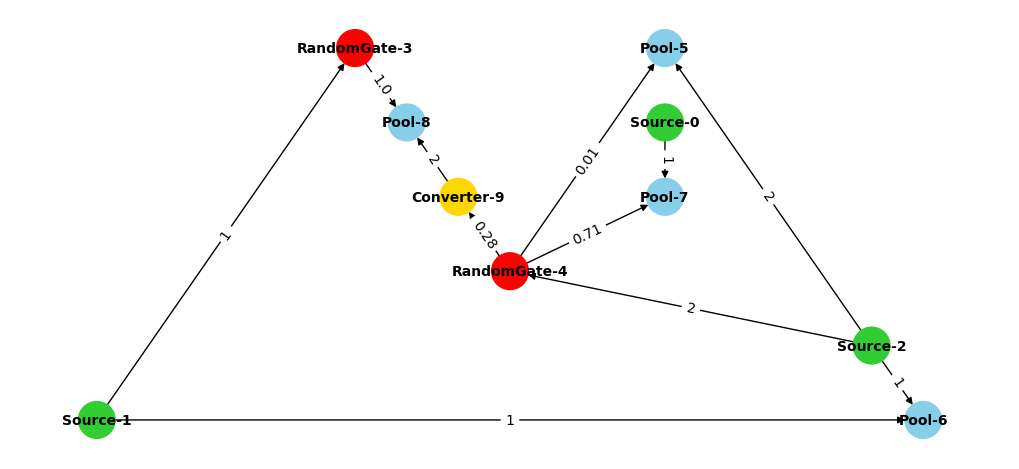

In [4]:
# create graph and plot it (using networkx library)
g = Graph(conf, egg.get_best())
g.plot()
# Note: weights on edges are randomly initialized --> these are to be fixed with the balancer

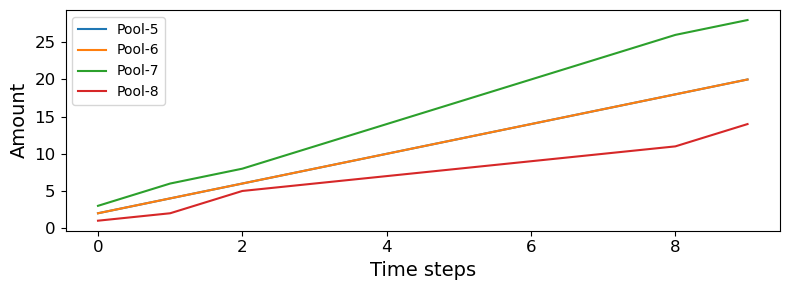

In [5]:
# simulate a graph economy
SIMULATION_STEPS = 40
g.simulate(10)
# plot simulation over time
g.simulator.plot_monitor(figsize=(8, 3))

## The Balancer: Balancing of graph-based Game Economies

* Balance an existing of newly generated economy to e.g., produce a specific amount of resources within a specific amount of time. 

In this example we use the generated graph from above and balance the graph's weights for the Pool with ID 7 to contain a value of 42 resources after 20 simulation steps.

Runtime can vary greatly from seconds to >1 hour, depending on the graph size, configuration and your hardware. You may also want to change the number of generations. Please note that, there are configurations for which there is no mathematically possible solution.


You can specify frozen weights by providing edge indices that should be excluded from modifications while balancing. Note that, the solution space for the algorithm will shrink, making it harder to find solutions.

In [102]:
POOL_ID = 5
BALANCE_VALUE = 42
TIME = 10  # simulation steps
POOL_NODE_ID = g.get_nodes_of(n.Pool).index(g.nodes[POOL_ID])
GENERATIONS = 200

In [103]:
# create and run balancer
balancer = Balancer(config=g.config, edge_list=g.edge_list, balance_pool_ids=[POOL_NODE_ID], n_sim_steps=TIME,
                    balance_value=BALANCE_VALUE, alpha=0.01, frozen_weights=None)
balancer.run(GENERATIONS)

Stopped after 154 iteration with a fitness of: 0.99


(0.99, 154)

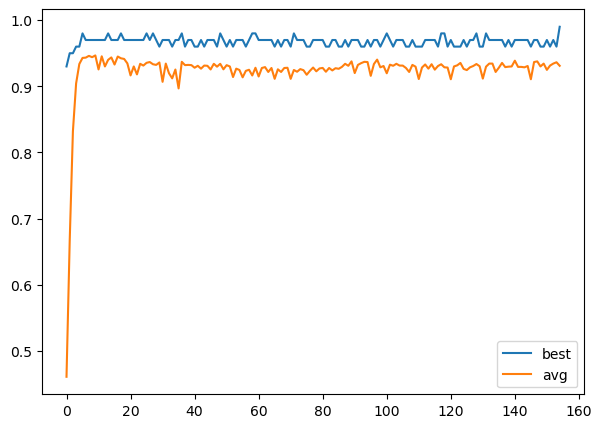

In [104]:
# plotting fitness over time 
balancer.plot_monitor()

In [108]:
# weights after balancing
balancer.result

[[5, 5, 2, 3, 4, 7, 16],
 [0.42555000000000004, 0.28555, 0.11554999999999997, 0.0055499999999999855]]

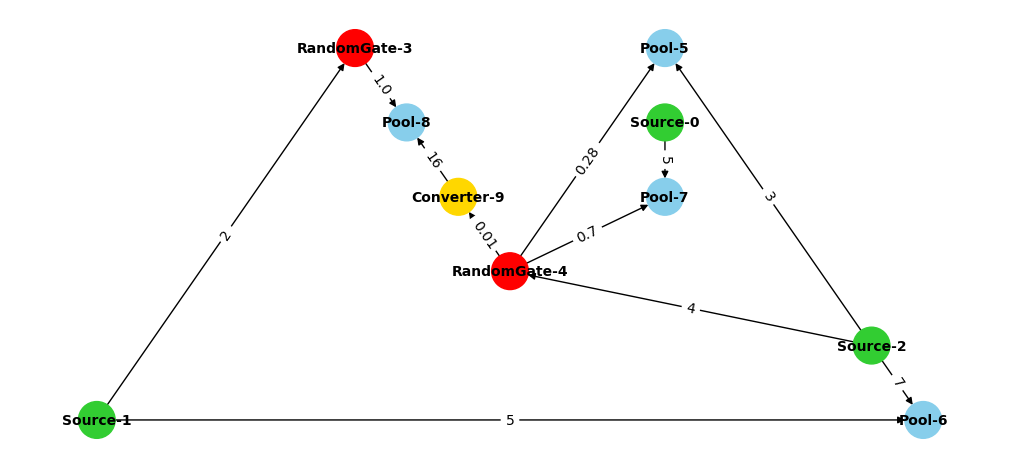

In [109]:
# plot the economy graph with updated weights
balanced_graph = Graph(conf, g.edge_list, weights=balancer.result)
balanced_graph.plot()

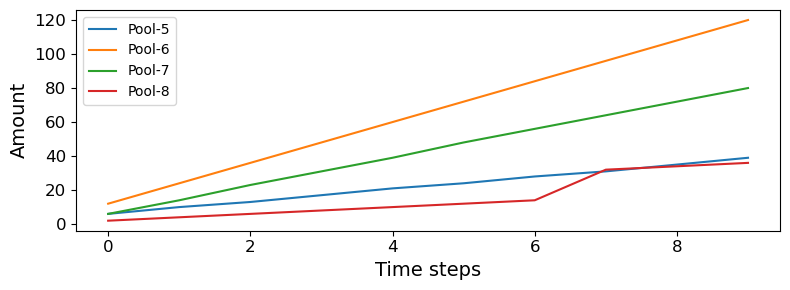

In [111]:
# simulate the economy
balanced_graph.simulate(10)
balanced_graph.simulator.plot_monitor(figsize=(8, 3))